In [5]:
import pandas as pd, sqlite3

conn = sqlite3.connect("../data/checking-logs.sqlite")

In [6]:
## Getting datetime only from users (user_*)
query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""

views = pd.read_sql(query, conn, parse_dates=["datetime"])


In [3]:
## Group by date and count views
views["date"] = views["datetime"].dt.date
views_per_day = views.groupby("date").size().reset_index(name="views")


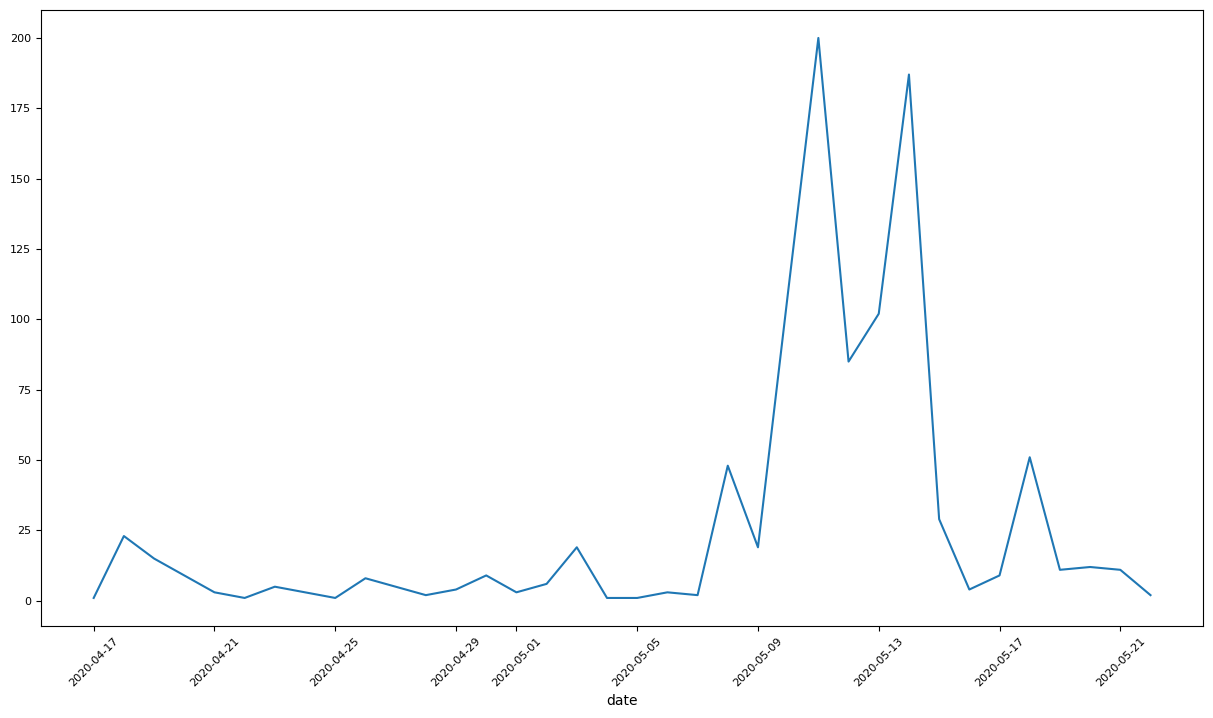

In [4]:
## Graph (line chart)
ax = views_per_day.plot(
    x="date", 
    y="views", 
    kind="line", 
    figsize=(15, 8), 
    legend=False
)
ax.tick_params(axis='x', labelrotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)


In [ ]:
conn.close()